In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import xgboost as xgb
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

In [69]:
df = pd.read_csv('COVID19_state.csv')
df.head()

,State,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income Per Capita,GDP Per Capita,...,Physicians,Hospitals,Health Spending,Pollution,Med-Large Airports,Avg Temp,Urban,Age 0-25,Age 26-54,Age 55+
0,Alaska,3334,114,3.0,734002,1.2863,0.4081,119,59687,73205,...,1900,21,11064,6.4,1.0,26.6,66.0,0.36,0.39,0.25
1,Alabama,4755,830,4.0,4908621,96.9221,0.4847,1533,42334,45219,...,12205,101,7281,8.1,1.0,62.8,59.0,0.33,0.37,0.31
2,Arkansas,3536,449,6.0,3038999,58.4030,0.4719,732,42566,42454,...,7150,88,7408,7.1,0.0,60.4,56.2,0.34,0.37,0.30
3,Arizona,1303,912,16.0,7378494,64.9550,0.4713,1559,43650,48055,...,17806,83,6452,9.7,1.0,60.3,89.8,0.33,0.36,0.30
4,California,89600,4643,101.0,39937489,256.3727,0.4899,7338,62586,74205,...,112906,359,7549,12.8,9.0,59.4,95.0,0.33,0.40,0.26


In [70]:
y_cases = df['Infected']
y_deaths = df['Deaths']
X = df[df.columns[3:]]

In [71]:
def make_corr_map(df, title='Correlation Heat Map'):
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(240, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title(title)
    plt.show()

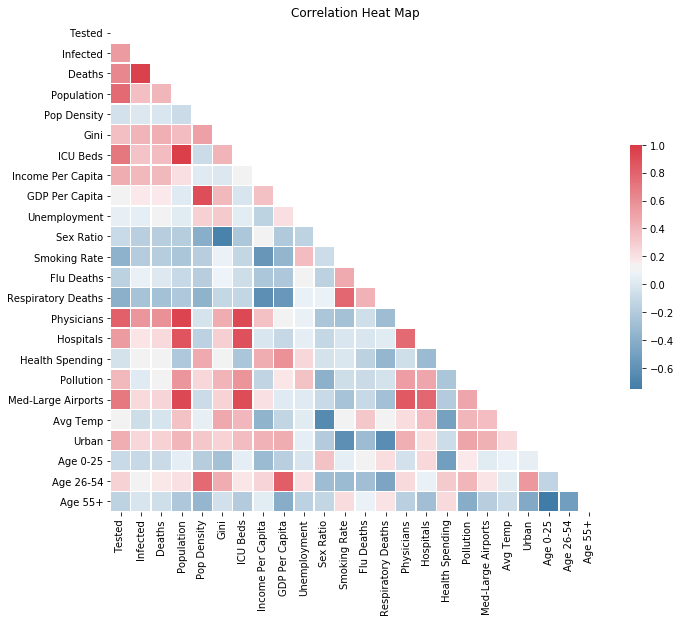

In [72]:
make_corr_map(df)

In [73]:
# plt.scatter(df['Deaths'], df['Age 55+'])
# plt.xlabel('Deaths')
# plt.ylabel('Age 55+')
# plt.show()

In [74]:
X_s = RobustScaler().fit_transform(X)

## XGBoost

Score 0.6117541934918862


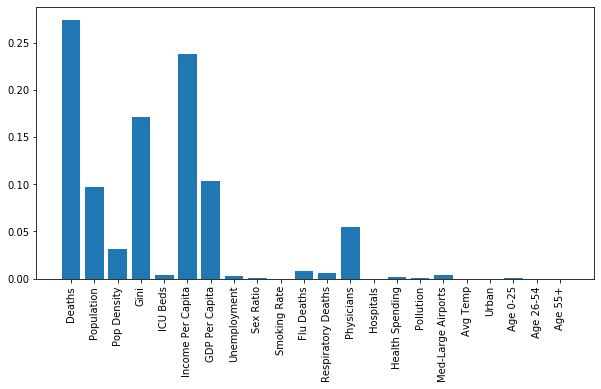

In [75]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_s, y_cases)
print('Score', xg_reg.score(X_s, y_cases))
# [print(c + '\t', f) for c,f in zip(X.columns, xg_reg.feature_importances_)]
plt.figure(figsize=(10,5))
plt.bar(X.columns, xg_reg.feature_importances_)
plt.xticks(fontsize=10, rotation=90)
plt.show()

## Regression

In [76]:
est = sm.OLS(y_cases, X_s)
est2 = est.fit()
print(est2.summary(xname=[*X.columns]))
# small pval, reject the null hypothesis that a feature has no effect

                                 OLS Regression Results                                
Dep. Variable:               Infected   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              33.88
Date:                Mon, 30 Mar 2020   Prob (F-statistic):                    3.67e-15
Time:                        14:45:31   Log-Likelihood:                         -451.71
No. Observations:                  51   AIC:                                      947.4
Df Residuals:                      29   BIC:                                      989.9
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

### Random Forest

score 0.8865223593963354 



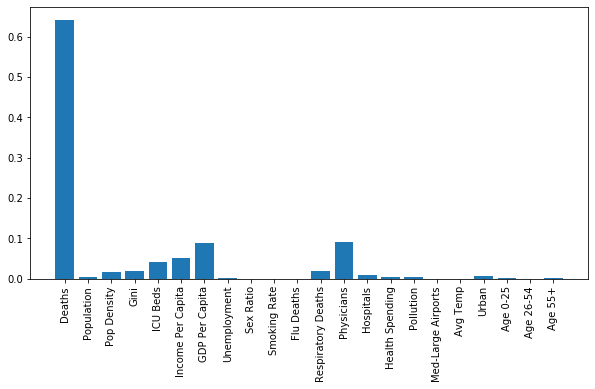

In [77]:
rfr = RandomForestRegressor(max_depth=3)
rfr.fit(X_s, y_cases)
print('score', rfr.score(X_s, y_cases), '\n')
plt.figure(figsize=(10,5))
plt.bar(X.columns, rfr.feature_importances_)
plt.xticks(fontsize=10, rotation=90)
plt.show()

Idea! The predictors can be split into 2 groups. Don't compare flu deaths to gdp!